#### 랜덤포레스트(Random Forest)는 모형 결합(앙상블 방법론)의 하나  
- 모형 결합(model combining)의 또 다른 이름은 **'앙상블 방법론(ensembel methods)'**
- 특정한 하나의 예측 방법이 아닌 복수의 예측 모형을 결합하여 더 나은 성능을 예측하려는 시도. -> **다수의 weak classifier로 strong classifier를 만든다.** 
- 앙상블 방법론의 장점  
    1. 단일 모형(의사결정나무, logistic regression 등)을 사용할 때보다 과 최적화가 방지
    2. 개별 모형이 성능이 안 좋을 경우에는 결합 모형의 성능이 더 향상된다.
    
모형 결합 방법은 크게 2가지, 취합(aggregation)방법론과 부스팅(boosting)방법론으로 나눌 수 있다.  
- 취합 방법론 : 사용할 모형이 이미 결정되어짐(ex. 랜덤포레스트)
- 부스팅 방버론 : 사용할 모형을 점진적으로 늘려가는 형태(ex. xgboost)

#### 랜덤 포레스트(Random Forest)란?
- 의사결정나무(Decision Tree)를 개별 모형으로 사용하는 모형 결합 방법.
- 장점 : 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점. 및 과최적화 방지
- 단점 : 분류 시에는 성능이 좋으나 회귀에는 분류만큼 성능이 좋지 않음.

### 어떻게 사용되고 있나?
- 은행 : 충성 고객 혹은 사기꾼 탐색(Fraud Detection)
- 의료계 : 병 혹은 병에 필요한 약에 대한 분류
- e-commerce : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv", nrows = 50000)

test = pd.read_csv("train.csv",  nrows = 1000000)
test = test.iloc[50000 : 100000, : ].reset_index(drop = True)

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test.head()

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,50000,id2135926,1,2016-02-24 19:55:41,2016-02-24 20:04:17,1,-73.955833,40.764122,-73.972466,40.746265,N,516
1,50001,id3971615,1,2016-01-07 01:20:39,2016-01-07 01:29:00,1,-74.006340,40.739609,-73.991081,40.751244,N,501
2,50002,id0804945,1,2016-03-11 16:31:33,2016-03-11 16:35:05,1,-73.981224,40.780811,-73.974716,40.778027,N,212
3,50003,id1347023,2,2016-04-21 20:10:06,2016-04-21 20:20:01,1,-73.977242,40.749477,-73.997513,40.744823,N,595
4,50004,id2536092,1,2016-04-26 17:18:09,2016-04-26 17:22:49,2,-73.966209,40.762070,-73.955780,40.768124,N,280


In [10]:
train.drop(columns = ["id", "vendor_id", "store_and_fwd_flag", "dropoff_datetime"], axis = 0, inplace = True, errors = 'ignore')
test.drop(columns = ["id", "vendor_id", "store_and_fwd_flag", "dropoff_datetime", "index"], axis = 0, inplace = True, errors = 'ignore')


In [11]:
train.head()

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455
1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435


In [12]:
test.head()

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2016-02-24 19:55:41,1,-73.955833,40.764122,-73.972466,40.746265,516
1,2016-01-07 01:20:39,1,-74.006340,40.739609,-73.991081,40.751244,501
2,2016-03-11 16:31:33,1,-73.981224,40.780811,-73.974716,40.778027,212
3,2016-04-21 20:10:06,1,-73.977242,40.749477,-73.997513,40.744823,595
4,2016-04-26 17:18:09,2,-73.966209,40.762070,-73.955780,40.768124,280


In [13]:
train["log1p_y"] = np.log1p(train["trip_duration"])

C:\Users\dskang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dskang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


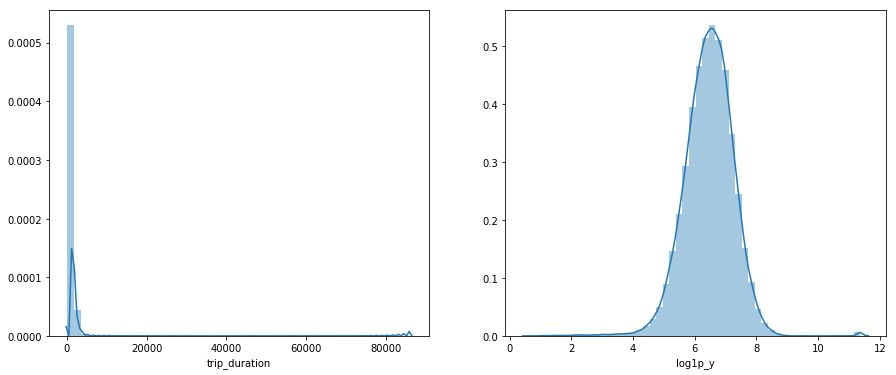

In [14]:
plt.figure(figsize = (15, 6))

ax1 = plt.subplot(1, 2, 1)
sns.distplot(train["trip_duration"], ax = ax1)

ax2 = plt.subplot(1, 2, 2)
sns.distplot(train["log1p_y"], ax = ax2)

In [15]:
train["hour"] = pd.to_datetime(train["pickup_datetime"]).dt.hour
test["hour"] = pd.to_datetime(test["pickup_datetime"]).dt.hour

In [16]:
train_y = train["log1p_y"]
train.drop(columns = ["trip_duration", "pickup_datetime", "log1p_y"], inplace = True, errors = "ignore")
test.drop(columns = ["pickup_datetime"], inplace = True, errors = "ignore")

In [24]:
test.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'hour'],
      dtype='object')

In [25]:
train_x = train
test_original = test.copy
test_y = np.log1p(test["trip_duration"])
test_x = test.drop(columns = "trip_duration", axis = 0,inplace = True)

In [26]:
regr = RandomForestRegressor(max_depth = 2)

In [27]:
regr.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
regr.feature_importances_

array([0.        , 0.50560623, 0.        , 0.49439377, 0.        ,
       0.        ])

In [30]:
predict_y = regr.predict(test)

In [38]:
def RMSLE(p, a) :
    
    """
    input : log1p 계산이 되어 있는 array 형태로
    output : score
    
    """
    print(p, a)
    
    result = np.sqrt([sum[p_row - a_row] for p_row, a_row in zip(p, a)]/ len(a))
    
    return result
        

In [39]:
RMSLE(predict_y, test_y)

[6.37470236 6.37470236 6.37470236 ... 7.37557782 6.37470236 6.37470236] 0        6.248043
1        6.218600
2        5.361292
3        6.390241
4        5.638355
5        5.572154
6        5.231109
7        6.943122
8        5.686975
9        6.084499
10       5.370638
11       5.877736
12       6.680855
13       5.820083
14       5.771441
15       6.210600
16       6.184149
17       5.817111
18       7.443664
19       5.771441
20       7.515889
21       5.384495
22       6.756932
23       7.300473
24       5.587249
25       6.706862
26       7.324490
27       6.903747
28       5.771441
29       7.052721
           ...   
49970    4.997212
49971    5.993961
49972    6.240276
49973    7.920083
49974    5.609472
49975    6.361302
49976    7.593878
49977    6.856462
49978    7.780721
49979    6.549651
49980    6.200509
49981    7.213032
49982    5.746203
49983    6.152733
49984    6.712956
49985    6.638568
49986    5.991465
49987    8.024535
49988    6.647688
49989    5.902633
49990    6

TypeError: 'builtin_function_or_method' object is not subscriptable